# Advanced Data Cleaning I

### Tips: Before you start your analysis read and explore the dataset and make a basic data cleaning (remove quotes from names and urls, convert date to datetime and split the date column to month and year and insert it to new columns).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

# CLEANING THE DATASET

In [2]:
df_original = pd.read_csv(r'igdb_dataset.csv', low_memory=False)
#df_original.head(10)

In [3]:
#df_original.info()

In [4]:
#df_original.describe()

In [5]:
#df_original.shape

In [6]:
df = df_original.copy()
df = df[['id','name','platforms','first_release_date','rating','rating_count','url']]
df

,id,name,platforms,first_release_date,rating,rating_count,url
0,70.0,"""TerraNova:StrikeForceCentauri""",13,8.259840e+08,70.0,2.0,"""https://www.igdb.com/games/terra-nova-strike-..."
1,40104.0,"""DogouSouken""",52,5.364576e+08,NaN,NaN,"""https://www.igdb.com/games/dogou-souken"""
2,51663.0,"""TheFiremen2:Pete&Danny""",NaN,NaN,NaN,NaN,"""https://www.igdb.com/games/the-firemen-2-pete..."
3,86911.0,"""Baccarat-BestCasinoBettingGame""",14,1.381968e+09,NaN,NaN,"""https://www.igdb.com/games/baccarat-best-casi..."
4,68841.0,"""Captivus""",6,1.506989e+09,NaN,NaN,"""https://www.igdb.com/games/captivus"""
...,...,...,...,...,...,...,...
135058,29532.0,"""TheMoonstoneEquation""",6,1.530317e+09,70.0,0.0,"""https://www.igdb.com/games/the-moonstone-equa..."
135059,89201.0,"""MagicMermaid""",39,1.496102e+09,90.0,0.0,"""https://www.igdb.com/games/magic-mermaid"""
135060,46274.0,"""JoeMontanaII:SportstalkFootball""",29,6.730560e+08,NaN,NaN,"""https://www.igdb.com/games/joe-montana-ii-spo..."
135061,18879.0,"""Horde:TheNorthernWind""",6,9.415872e+08,82.3178111078051,6.0,"""https://www.igdb.com/games/horde-the-northern..."


In [7]:
df.shape

(135063, 7)

In [8]:
df.describe()

,id,first_release_date,rating_count
count,135062.000000,7.329400e+04,31300.000000
mean,70664.254972,1.228842e+09,13.901086
std,40694.453733,3.468703e+08,75.022597
min,1.000000,-6.943968e+08,0.000000
25%,35540.250000,9.851328e+08,0.000000
50%,70690.500000,1.382659e+09,1.000000
75%,105830.750000,1.499386e+09,5.000000
max,141114.000000,1.735603e+09,2783.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135063 entries, 0 to 135062
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  135062 non-null  float64
 1   name                135061 non-null  object 
 2   platforms           75337 non-null   object 
 3   first_release_date  73294 non-null   float64
 4   rating              31303 non-null   object 
 5   rating_count        31300 non-null   float64
 6   url                 135061 non-null  object 
dtypes: float64(3), object(4)
memory usage: 7.2+ MB


In [10]:
df.dropna(subset=['first_release_date'],inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73294 entries, 0 to 135061
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  73294 non-null  float64
 1   name                73294 non-null  object 
 2   platforms           73292 non-null  object 
 3   first_release_date  73294 non-null  float64
 4   rating              27050 non-null  object 
 5   rating_count        27049 non-null  float64
 6   url                 73294 non-null  object 
dtypes: float64(3), object(4)
memory usage: 4.5+ MB


In [12]:
df['url'] = df['url'].replace(to_replace='"', value='', regex=True)
df['name'] = df['name'].replace(to_replace='"', value='', regex=True)
df.head(10)

,id,name,platforms,first_release_date,rating,rating_count,url
0,70.0,TerraNova:StrikeForceCentauri,13,8.259840e+08,70.0,2.0,https://www.igdb.com/games/terra-nova-strike-f...
1,40104.0,DogouSouken,52,5.364576e+08,NaN,NaN,https://www.igdb.com/games/dogou-souken
3,86911.0,Baccarat-BestCasinoBettingGame,14,1.381968e+09,NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...
4,68841.0,Captivus,6,1.506989e+09,NaN,NaN,https://www.igdb.com/games/captivus
5,33284.0,Onewaytoexit,6,1.457741e+09,NaN,NaN,https://www.igdb.com/games/one-way-to-exit
12,74857.0,Transcend,6,1.512086e+09,50.0,0.0,https://www.igdb.com/games/transcend
15,58674.0,PKTBALL,"34,39",1.459987e+09,NaN,NaN,https://www.igdb.com/games/pktball
16,132972.0,OnePiece:PirateWarriors4-DeluxeEdition,48,1.588032e+09,NaN,NaN,https://www.igdb.com/games/one-piece-pirate-wa...
17,48468.0,HomeRunNighter'90:ThePennantLeague,18,6.514560e+08,NaN,NaN,https://www.igdb.com/games/home-run-nighter-90...
18,78193.0,TestDrive,"6,8,11",1.041293e+09,NaN,NaN,https://www.igdb.com/games/test-drive--1


In [13]:
df = df[df['first_release_date']>0]
df['first_release_date'] = pd.to_datetime(df['first_release_date'],unit='s')
df.head(30)

/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,platforms,first_release_date,rating,rating_count,url
0,70.0,TerraNova:StrikeForceCentauri,13,1996-03-05,70.0,2.0,https://www.igdb.com/games/terra-nova-strike-f...
1,40104.0,DogouSouken,52,1987-01-01,NaN,NaN,https://www.igdb.com/games/dogou-souken
3,86911.0,Baccarat-BestCasinoBettingGame,14,2013-10-17,NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...
4,68841.0,Captivus,6,2017-10-03,NaN,NaN,https://www.igdb.com/games/captivus
5,33284.0,Onewaytoexit,6,2016-03-12,NaN,NaN,https://www.igdb.com/games/one-way-to-exit
12,74857.0,Transcend,6,2017-12-01,50.0,0.0,https://www.igdb.com/games/transcend
15,58674.0,PKTBALL,"34,39",2016-04-07,NaN,NaN,https://www.igdb.com/games/pktball
16,132972.0,OnePiece:PirateWarriors4-DeluxeEdition,48,2020-04-28,NaN,NaN,https://www.igdb.com/games/one-piece-pirate-wa...
17,48468.0,HomeRunNighter'90:ThePennantLeague,18,1990-08-24,NaN,NaN,https://www.igdb.com/games/home-run-nighter-90...
18,78193.0,TestDrive,"6,8,11",2002-12-31,NaN,NaN,https://www.igdb.com/games/test-drive--1


In [14]:
#df['rating'] = pd.to_numeric(df['rating'])#, errors='coerce')
#df.info()
x = df[df['rating'].str.contains(r'.*[a-zA-Z].*')==True]#.str.findall(r'(?!([0-9]+\.[0-9]+).)*$')
x

,id,name,platforms,first_release_date,rating,rating_count,url
52131,30686.0,B.BraunFutureOperatingRoom,6,2016-12-09,"om""",NaN,https://www.igdb.com/games/b-braun-future-oper...
56511,20245.0,Haunt,12,2012-01-18,"ount"":3",3.0,https://www.igdb.com/games/haunt
97822,5089.0,Pac-ManParty,"5,37",2010-11-16,"ount"":4",4.0,https://www.igdb.com/games/pac-man-party
110217,26762.0,1-2-Switch,130,2017-03-03,"ount"":10",10.0,https://www.igdb.com/games/1-2-switch


In [15]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['year_release_date']=pd.DatetimeIndex(df['first_release_date']).year
df['month_release_date']=pd.DatetimeIndex(df['first_release_date']).month
df.head()

/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,id,name,platforms,first_release_date,rating,rating_count,url,year_release_date,month_release_date
0,70.0,TerraNova:StrikeForceCentauri,13,1996-03-05,70.0,2.0,https://www.igdb.com/games/terra-nova-strike-f...,1996,3
1,40104.0,DogouSouken,52,1987-01-01,NaN,NaN,https://www.igdb.com/games/dogou-souken,1987,1
3,86911.0,Baccarat-BestCasinoBettingGame,14,2013-10-17,NaN,NaN,https://www.igdb.com/games/baccarat-best-casin...,2013,10
4,68841.0,Captivus,6,2017-10-03,NaN,NaN,https://www.igdb.com/games/captivus,2017,10
5,33284.0,Onewaytoexit,6,2016-03-12,NaN,NaN,https://www.igdb.com/games/one-way-to-exit,2016,3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73283 entries, 0 to 135061
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  73283 non-null  float64       
 1   name                73283 non-null  object        
 2   platforms           73281 non-null  object        
 3   first_release_date  73283 non-null  datetime64[ns]
 4   rating              27044 non-null  float64       
 5   rating_count        27047 non-null  float64       
 6   url                 73283 non-null  object        
 7   year_release_date   73283 non-null  int64         
 8   month_release_date  73283 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 5.6+ MB


# 1.What’s the first game ever released and when (not created)?

In [17]:
df.loc[df['first_release_date'] == df['first_release_date'].min()]
#df['first_release_date'].min()
#df
#df[df['first_release_date'].min()].index
#df.index[df['first_release_date'].min() == df['first_release_date']]

,id,name,platforms,first_release_date,rating,rating_count,url,year_release_date,month_release_date
82269,56115.0,JetRocket,52,1970-06-30,NaN,NaN,https://www.igdb.com/games/jet-rocket,1970,6


# 2.Which are the top 5 games of all time? (tip: many games score 100 rating and have a few reviews, other games score a bit lower but much higher reviews...)

# Testing SCALERS

In [18]:
df['rating'].unique().astype('int')
#df['rating_count'][124]
#df.describe()
#df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce',downcast = 'integer')
#df['rating'] = pd.to_numeric(df['rating'], errors='coerce',downcast = 'integer')
df_test = df.copy()
#df_test = df_test[['rating','rating_count']]
df_test['weighted_score'] = df['rating_count']*df['rating']
df_test= df_test[['rating','rating_count','weighted_score']]
df_test.head()

,rating,rating_count,weighted_score
0,70.0,2.0,140.0
1,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN


In [20]:
#sc_X = StandardScaler()
#sc_X = sc_X.fit_transform(df_test)
#Convert to table format - StandardScaler 
#sc_X = pd.DataFrame(data=sc_X, columns=["rating","rating_count"])
#sc_X['weighted_score']= sc_X['rating']+sc_X['rating_count']
#sc_X.head(20)

scaler = MinMaxScaler()
scaler.fit(df_test)
scaled_features = scaler.transform(df_test)
#Convert to table format - MinMaxScaler
df_MinMax = pd.DataFrame(data=scaled_features, columns=['rating','rating_count','weighted_score'])
#df_MinMax['weighted_score']= df_MinMax['rating']+df_MinMax['rating_count']
df_MinMax.head()

,rating,rating_count,weighted_score
0,0.7,0.000719,0.000553
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [23]:
df['weighted_score'] = df_MinMax['weighted_score']
df.sort_values('weighted_score',ascending=False, inplace=True)
df.head(10)

/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,platforms,first_release_date,rating,rating_count,url,year_release_date,month_release_date,weighted_score
34828,93274.0,Zurk'sLearningSafari,6,1993-01-01,NaN,NaN,https://www.igdb.com/games/zurks-learning-safari,1993,1,1.000000
70777,23489.0,TheTaleofaCommonMan,6,2014-10-17,70.0,0.0,https://www.igdb.com/games/the-tale-of-a-commo...,2014,10,0.684626
72187,39095.0,TheSagaofEriktheViking,"15,25,26,69",1984-12-31,NaN,NaN,https://www.igdb.com/games/the-saga-of-erik-th...,1984,12,0.668864
22154,37540.0,PatriotsIIIBALListicBusters,70,1996-02-01,NaN,NaN,https://www.igdb.com/games/patriots-iii-ballis...,1996,2,0.638043
72203,49346.0,Tweety&TheMagicGems,24,2001-08-09,NaN,NaN,https://www.igdb.com/games/tweety-and-the-magi...,2001,8,0.584764
72399,2526.0,GodofThunder,13,1993-12-31,NaN,NaN,https://www.igdb.com/games/god-of-thunder,1993,12,0.537971
72205,57296.0,WhiteCatProject,"34,39",2014-07-24,NaN,NaN,https://www.igdb.com/games/white-cat-project,2014,7,0.536544
62901,78486.0,LondonControl,6,2015-12-31,NaN,NaN,https://www.igdb.com/games/london-control,2015,12,0.514144
19994,52924.0,Divinity:OriginalSinEnhancedEdition-Collector'...,6,2014-12-31,NaN,NaN,https://www.igdb.com/games/divinity-original-s...,2014,12,0.475761
72420,4085.0,ReiFighterGekitsuiSenki,21,2003-03-06,23.0,0.0,https://www.igdb.com/games/rei-fighter-gekitsu...,2003,3,0.459613


# SOLUTION

In [25]:
df.drop(df[df['rating_count'] == 0].index, inplace=True)
df['weighted_score'] = df['rating'] * df['rating_count']
df['normalized_weighted_score'] = (df['weighted_score'] - df['weighted_score'].min())/(df['weighted_score'].max() - df['weighted_score'].min()) * 100
df.sort_values('normalized_weighted_score',ascending=False, inplace=True)
df.head(5)

/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alkis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

,id,name,platforms,first_release_date,rating,rating_count,url,year_release_date,month_release_date,weighted_score,normalized_weighted_score
76901,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,91.007003,2783.0,https://www.igdb.com/games/grand-theft-auto-v,2013,9,253272.490450,100.000000
89699,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,95.708657,2468.0,https://www.igdb.com/games/the-witcher-3-wild-...,2015,5,236208.966262,93.262780
133848,72.0,Portal2,"3,6,9,12,14",2011-04-19,91.331534,2116.0,https://www.igdb.com/games/portal-2,2011,4,193257.526516,76.304192
68308,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,87.714979,2184.0,https://www.igdb.com/games/the-elder-scrolls-v...,2011,11,191569.514797,75.637711
132155,1009.0,TheLastofUs,9,2013-06-14,94.494275,1835.0,https://www.igdb.com/games/the-last-of-us,2013,6,173396.994439,68.462625


# 3.Do game ratings vary from year to year?


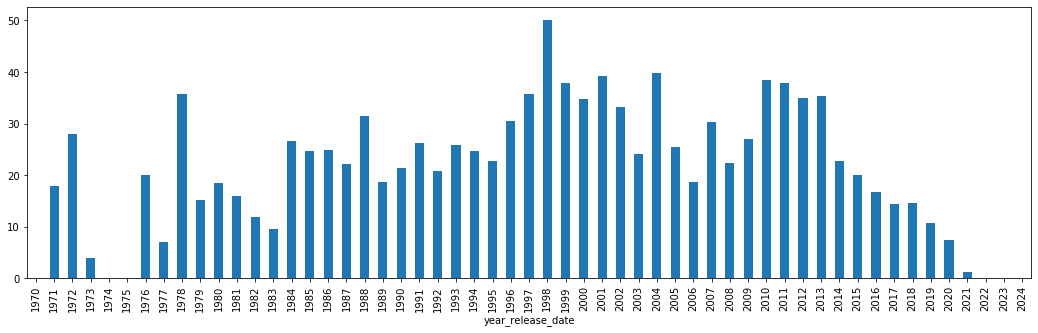

In [30]:
#Looking at each graph will give an idea about their variance from year to year
ratings = df.groupby(by='year_release_date')['rating_count'].mean()
ratings.plot.bar(figsize=(18,5))
None

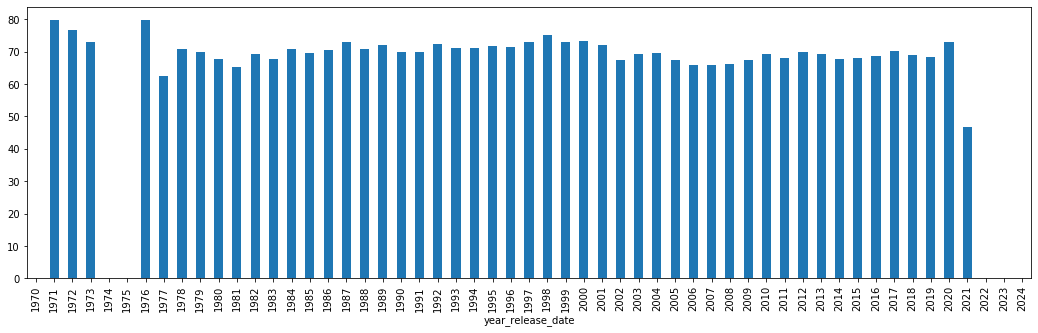

In [28]:
ratings = df.groupby(by='year_release_date')['rating'].mean()
ratings.plot.bar(figsize=(18,5))
None

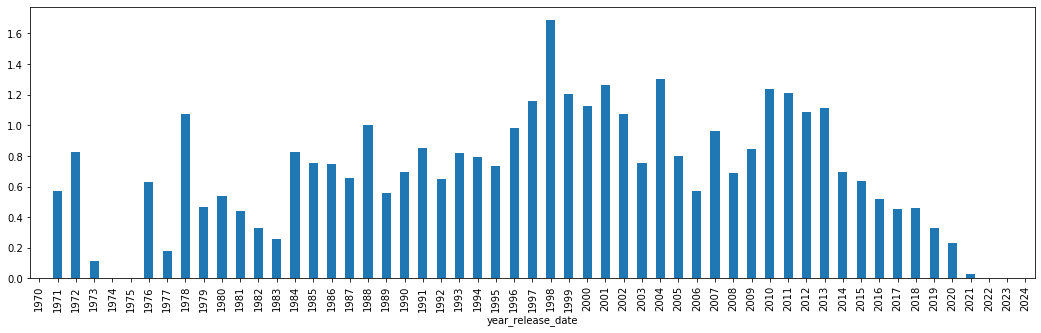

In [29]:
ratings = df.groupby(by='year_release_date')['normalized_weighted_score'].mean()
ratings.plot.bar(figsize=(18,5))
None

# 4.In which year the most games were released?


In [65]:
#df.groupby(by = df['year_release_date']).count().sort_values('id', ascending = False).head(1).index[0]

most_df = df.groupby(by='year_release_date').count().sort_values('id',ascending=False).head()
most_df[['id']]

,id
year_release_date,
2017,8840
2016,6560
2020,4686
2015,4309
2018,4259


# 5.In the last 5 years, which month were released the most games per year, can you guess why?

In [33]:
df_five = df[(df['first_release_date'] >= datetime(2016,1,1)) & (df['first_release_date'] <= datetime(2020,12,31))]
df_five

,id,name,platforms,first_release_date,rating,rating_count,url,year_release_date,month_release_date,weighted_score,normalized_weighted_score
133854,7331.0,Uncharted4:AThief'sEnd,48,2016-05-10,92.424968,1248.0,https://www.igdb.com/games/uncharted-4-a-thief...,2016,5,115346.360029,45.542396
134338,7346.0,TheLegendofZelda:BreathoftheWild,"41,130",2017-03-03,92.156404,1191.0,https://www.igdb.com/games/the-legend-of-zelda...,2017,3,109758.277678,43.336044
133085,19560.0,GodofWar,48,2018-04-20,95.376476,1144.0,https://www.igdb.com/games/god-of-war--1,2018,4,109110.688332,43.080355
133878,11156.0,HorizonZeroDawn,"6,48",2017-02-28,91.690298,989.0,https://www.igdb.com/games/horizon-zero-dawn,2017,2,90681.704579,35.804009
81933,7351.0,DOOM,"6,48,49",2016-05-13,86.189907,1026.0,https://www.igdb.com/games/doom--2,2016,5,88430.844465,34.915298
...,...,...,...,...,...,...,...,...,...,...,...
135040,61649.0,AnovaCalif\u00f3rnia,6,2017-11-20,NaN,NaN,https://www.igdb.com/games/a-nova-california,2017,11,NaN,NaN
135043,55730.0,DEFECTIVE,6,2017-09-04,NaN,NaN,https://www.igdb.com/games/defective,2017,9,NaN,NaN
135044,31737.0,ZombieTrigger,6,2016-08-01,NaN,NaN,https://www.igdb.com/games/zombie-trigger,2016,8,NaN,NaN
135047,126473.0,FiveNightsatFreddy'sAR:SpecialDelivery,"34,39",2019-11-25,NaN,NaN,https://www.igdb.com/games/five-nights-at-fred...,2019,11,NaN,NaN


In [34]:
df_year_month = df_five.groupby(['year_release_date','month_release_date'])['id'].count()
df_year_month

year_release_date  month_release_date
2016               1                     226
                   2                     244
                   3                     329
                   4                     321
                   5                     278
                   6                     318
                   7                     349
                   8                     389
                   9                     457
                   10                    500
                   11                    432
                   12                    608
2017               1                     368
                   2                     384
                   3                     481
                   4                     424
                   5                     428
                   6                     432
                   7                     593
                   8                     666
                   9                     725
                 

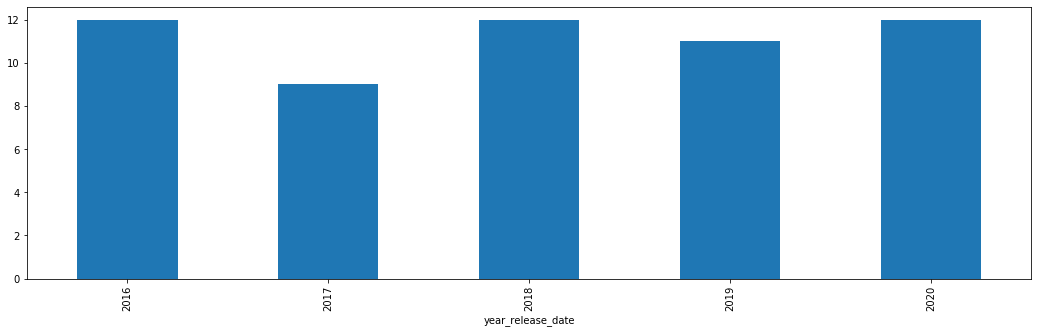

In [35]:
df_year_month.unstack().idxmax(axis=1).plot.bar(figsize=[18,5])
None

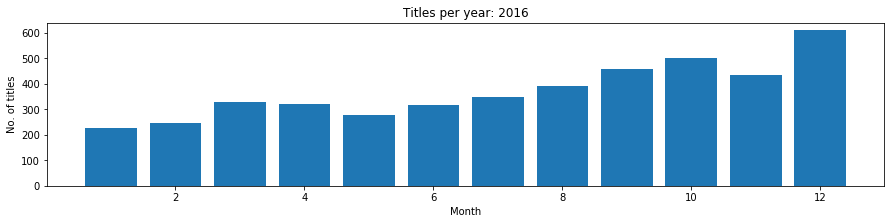

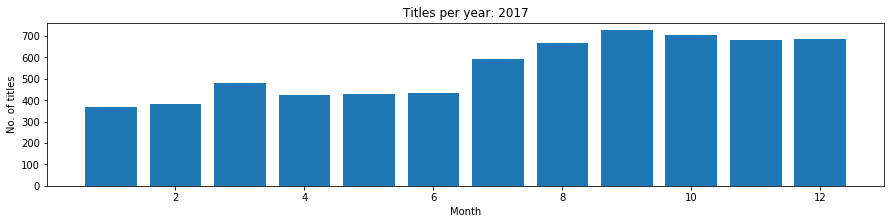

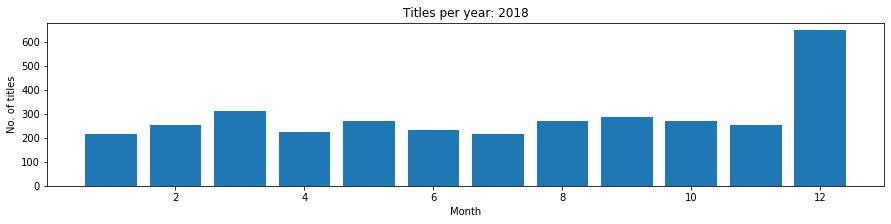

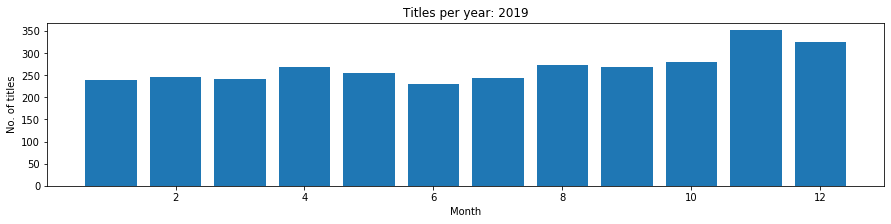

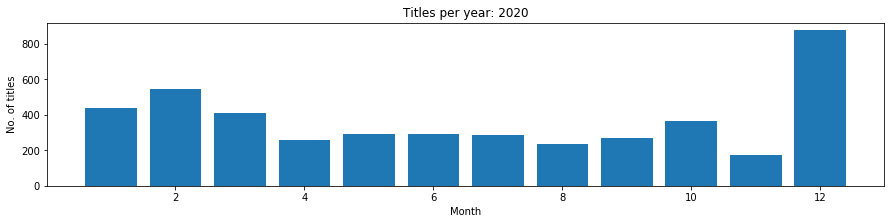

In [38]:
df_releases = df_five.groupby(['year_release_date', 'month_release_date'])['id'].agg('count').reset_index()
years = [2016, 2017, 2018, 2019, 2020]

for year in years:
    x = df_releases[df_releases['year_release_date'] == year]
    plt.figure(figsize=(15,3))
    plt.title('Titles per year: {}'.format(year))
    plt.xlabel('Month')
    plt.ylabel('No. of titles')
    plt.bar(x['month_release_date'],x['id'])
    None